In [1]:
#import libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from keras.models import Sequential,Model,load_model
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.layers import BatchNormalization, Lambda, Input, Dense, Dropout, Flatten, Activation
from keras.callbacks import ModelCheckpoint

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

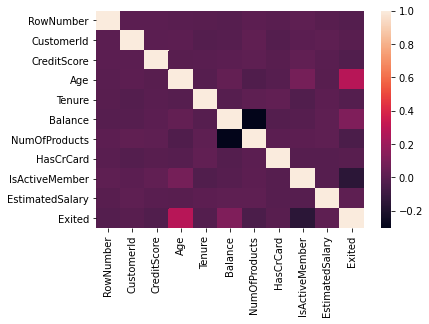

In [6]:
sns.heatmap(dataset.corr())

In [7]:
#Check if there is class imbalance in Purchase
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
y = dataset.pop('Exited')

In [9]:
categorical_columns = []
numerical_columns = []
#function that returns categorical and numerical column
def cat_num(final_train_data):
    for col in final_train_data.columns :
        if final_train_data[col].dtype == "object":
            categorical_columns.append(col)
        elif (final_train_data[col].dtype == "int64") | (final_train_data[col].dtype == "float64"):
            numerical_columns.append(col)
    return numerical_columns, categorical_columns
        
cat_num(dataset)
categorical_columns

['Surname', 'Geography', 'Gender']

In [10]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
#label encode gender column
encoders = {}
for column in ["Gender"]:
    le = LabelEncoder()
    dataset.Gender = le.fit_transform(dataset.Gender)
    encoders[column] = le

In [12]:
def dummies(x,dfx):
    geo_dummy = pd.get_dummies(x,prefix_sep='_', prefix='geography')
    #merge encoded columns and train_dataset column
    train_dataset = pd.concat([dfx,geo_dummy], axis=1)
    #drop country column
    train_dataset.drop('Geography',axis=1,inplace=True)
    return train_dataset

In [13]:
train_dataset = dummies(dataset['Geography'],dataset)
train_dataset

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geography_France,geography_Germany,geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [14]:
X = train_dataset.drop([ 'Surname', 'RowNumber','CustomerId'], axis = 1)
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'geography_France',
       'geography_Germany', 'geography_Spain'],
      dtype='object')

#### Feature Scaling(Standard Scaler): This is to convert those numbers to fall between 0 and 1

In [15]:
mm = MinMaxScaler()
X = mm.fit_transform(X)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [17]:
X_train.shape

(8000, 12)

In [18]:
## Part 2 - Building the ANN
#Initializing the ANN
model = Sequential()

### Adding the input layer and the first hidden layer"""

model.add(Dense(units=6, activation = 'relu',input_shape=(8000,12)))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8000, 6)           78        
_________________________________________________________________
dense_1 (Dense)              (None, 8000, 6)           42        
_________________________________________________________________
dense_2 (Dense)              (None, 8000, 1)           7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, batch_size= 80, epochs= 100, verbose=2)

Epoch 1/100
100/100 - 31s - loss: 0.5795 - accuracy: 0.7680
Epoch 2/100
100/100 - 0s - loss: 0.5011 - accuracy: 0.7969
Epoch 3/100
100/100 - 0s - loss: 0.4869 - accuracy: 0.7969
Epoch 4/100
100/100 - 0s - loss: 0.4771 - accuracy: 0.7969
Epoch 5/100
100/100 - 0s - loss: 0.4707 - accuracy: 0.7970
Epoch 6/100
100/100 - 0s - loss: 0.4655 - accuracy: 0.7971
Epoch 7/100
100/100 - 0s - loss: 0.4618 - accuracy: 0.7985
Epoch 8/100
100/100 - 0s - loss: 0.4589 - accuracy: 0.7990
Epoch 9/100
100/100 - 0s - loss: 0.4555 - accuracy: 0.8008
Epoch 10/100
100/100 - 0s - loss: 0.4525 - accuracy: 0.8016
Epoch 11/100
100/100 - 0s - loss: 0.4496 - accuracy: 0.8036
Epoch 12/100
100/100 - 0s - loss: 0.4467 - accuracy: 0.8059
Epoch 13/100
100/100 - 0s - loss: 0.4425 - accuracy: 0.8081
Epoch 14/100
100/100 - 0s - loss: 0.4376 - accuracy: 0.8090
Epoch 15/100
100/100 - 0s - loss: 0.4341 - accuracy: 0.8115
Epoch 16/100
100/100 - 0s - loss: 0.4314 - accuracy: 0.8125
Epoch 17/100
100/100 - 0s - loss: 0.4298 - accur

In [21]:
ann = tf.keras.models.Sequential()

"""### Adding the input layer and the first hidden layer"""

ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))

"""### Adding the second hidden layer"""

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

"""### Adding the output layer"""

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

"""## Part 3 - Training the ANN

### Compiling the ANN
"""

ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

"""### Training the ANN on the Training set"""

ann.fit(X_train, y_train, batch_size= 32, epochs= 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5219 - accuracy: 0.7969
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7969
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7969
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7969
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7969
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.7969
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7969
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7969
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8002
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4322 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8615
Epoch 80/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8587
Epoch 81/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8619
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8590
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8624
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8601
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8593
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8605
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8610
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 

In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [24]:
y_test

2374    0
1784    0
6301    0
1600    0
7920    0
       ..
8623    0
5928    0
6714    0
5885    0
7289    0
Name: Exited, Length: 2000, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: "+str(round(acc*100))+"%")

Accuracy: 86%


In [26]:
input_data = {
   "Geography": "France",
    "Credit Score": 600,
    "Gender": "Male",
    "Age": 40,
    "Tenure": 3,
    "Balance": 60000,
    "NumOfProducts": 2,
    "HasCrCard":1,
    "IsActiveMember":1,
    "EstimatedSalary":50000
}

In [27]:
input_data = pd.DataFrame(input_data, index=[0])
# convert categoricals
for column in ["Gender"]:
    categorical_convert = encoders[column]
    input_data[column] = categorical_convert.fit_transform(input_data[column])

In [28]:
input_data=dummies(input_data['Geography'],input_data)
input_data

,Credit Score,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geography_France
0,600,0,40,3,60000,2,1,1,50000,1


In [29]:
add_data = {
       'geography_Germany':0, 'geography_Spain':0}
add_data = pd.DataFrame(add_data, index=[0])
input_data = pd.concat([input_data,add_data], axis=1)

In [30]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Credit Score       1 non-null      int64
 1   Gender             1 non-null      int32
 2   Age                1 non-null      int64
 3   Tenure             1 non-null      int64
 4   Balance            1 non-null      int64
 5   NumOfProducts      1 non-null      int64
 6   HasCrCard          1 non-null      int64
 7   IsActiveMember     1 non-null      int64
 8   EstimatedSalary    1 non-null      int64
 9   geography_France   1 non-null      uint8
 10  geography_Germany  1 non-null      int64
 11  geography_Spain    1 non-null      int64
dtypes: int32(1), int64(10), uint8(1)
memory usage: 93.0 bytes


In [31]:
PREDICTION = ann.predict(input_data)